In [1]:
import  pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Govinda Bennurkar\Downloads\netflix.csv")

In [5]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [8]:
df.shape

(5837, 12)

In [9]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [10]:
constraint=df['cast'].apply(lambda x: str(x).split(',')).tolist()

In [12]:
df_new=pd.DataFrame(constraint,index=df['title'])

In [13]:
df_new=df_new.stack()

In [15]:
df_new=pd.DataFrame(df_new)

In [16]:
df_new

0
title                                    
Chocolate            0          Ha Ji-won
                     1      Yoon Kye-sang
                     2      Jang Seung-jo
                     3         Kang Bu-ja
                     4      Lee Jae-ryong
...                                   ...
To and From New York 1        Shaana Diya
                     2   John Krisiukenas
                     3   Yoriko Haraguchi
                     4        David Crane
                     5        Chad Thomas

[41371 rows x 1 columns]

In [ ]:
df['cast'].nunique()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
var1 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(var1,index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Genre'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1

,title,Genre
0,Chocolate,International TV Shows
1,Chocolate,Korean TV Shows
2,Chocolate,Romantic TV Shows
3,Guatemala: Heart of the Mayan World,Documentaries
4,Guatemala: Heart of the Mayan World,International Movies
...,...,...
12758,Just Another Love Story,International Movies
12759,Dinner for Five,Stand-Up Comedy & Talk Shows
12760,To and From New York,Dramas
12761,To and From New York,Independent Movies


In [28]:
pd.isnull(df).sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(3447, 12)

In [31]:
pd.isnull(df)
pd.isnull(df).sum()
df.dropna(inplace=True)
df.shape

(3447, 12)

In [32]:
df.describe()

,show_id,release_year
count,3.447000e+03,3447.000000
mean,7.599440e+07,2012.572962
std,1.180951e+07,9.114564
min,2.698800e+05,1942.000000
25%,7.030419e+07,2012.000000
50%,8.015418e+07,2016.000000
75%,8.023963e+07,2017.000000
max,8.122720e+07,2019.000000


In [33]:
df.describe(include = 'object')

,title,director,cast,country,date_added,rating,duration,listed_in,description,type
count,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447
unique,3430,2723,3342,406,947,14,169,266,3439,2
top,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,"November 1, 2019",TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...,Movie
freq,3,18,10,1206,73,1135,88,230,3,3384


In [34]:
df_new1['Genre'].value_counts()

Genre
International Movies            1797
Dramas                          1488
Comedies                         992
International TV Shows           966
Documentaries                    658
TV Dramas                        574
Action & Adventure               532
Independent Movies               516
TV Comedies                      425
Crime TV Shows                   355
Thrillers                        353
Children & Family Movies         340
Romantic Movies                  338
Kids' TV                         313
Stand-Up Comedy                  273
Docuseries                       271
Romantic TV Shows                265
Music & Musicals                 229
Horror Movies                    229
British TV Shows                 205
Sci-Fi & Fantasy                 165
Sports Movies                    149
Reality TV                       146
TV Action & Adventure            122
Korean TV Shows                  120
Spanish-Language TV Shows        114
Anime Series                    

In [35]:
top_5_genre = df_new1['Genre'].value_counts().head()
print(top_5_genre)

print('***************************************')
top_5_country = df['country'].value_counts().head()
print(top_5_country)

Genre
International Movies      1797
Dramas                    1488
Comedies                   992
International TV Shows     966
Documentaries              658
Name: count, dtype: int64
***************************************
country
United States     1206
India              628
United Kingdom     139
Canada              76
Spain               69
Name: count, dtype: int64


In [36]:
df['country'].unique()

array(['India', 'France, Senegal, Belgium', 'Nigeria', 'France',
       'South Africa', 'United States', 'Germany, Canada, United States',
       'Canada, Norway', 'United States, United Arab Emirates', 'Japan',
       'United Kingdom, Germany, Canada, United States',
       'Australia, France', 'Mexico', 'Germany, United Kingdom',
       'Italy, United States',
       'United States, New Zealand, United Kingdom',
       'United Kingdom, Germany, United States', 'United States, Germany',
       'United Kingdom, France', 'United States, Spain, Chile, Peru',
       'Colombia', 'Argentina', 'Spain', 'United States, Ireland',
       'India, United States', 'China, Hong Kong', 'South Korea',
       'Canada, United States', 'Canada',
       'South Africa, United States, New Zealand, Canada',
       'United States, Canada', 'United States, Australia, Mexico',
       'United States, South Korea, Japan', 'United Kingdom',
       'United States, Italy, United Kingdom, Liechtenstein',
       'Hon

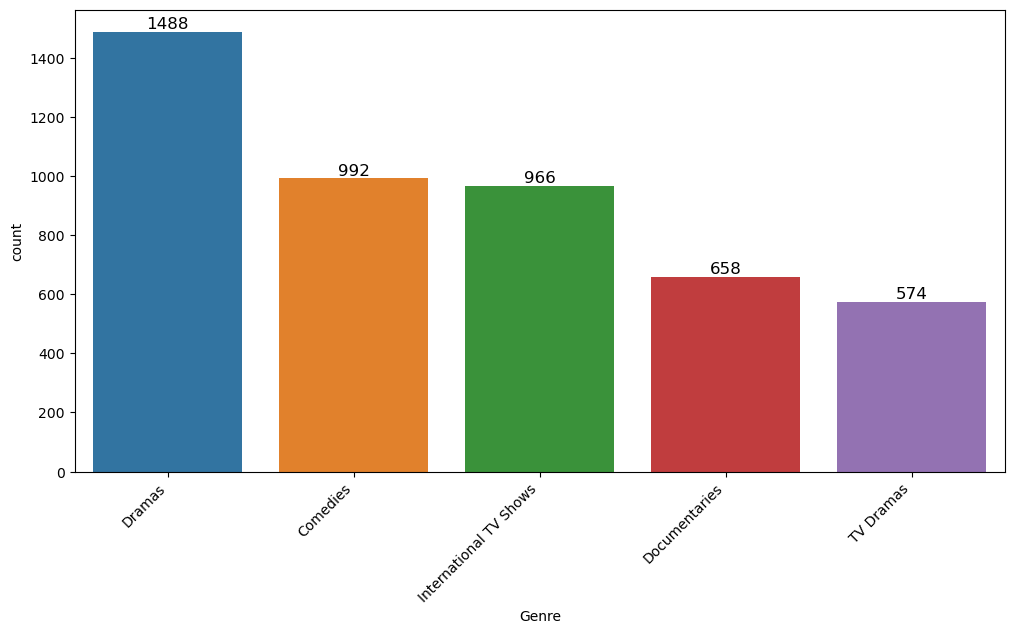

Genre
Dramas                    1488
Comedies                   992
International TV Shows     966
Documentaries              658
TV Dramas                  574
Name: count, dtype: int64


In [38]:
import seaborn as sns

df_IN1 = df_new1[df_new1['Genre'] != 'International Movies']

top_5_genre = df_IN1['Genre'].value_counts().head()
top_5_genre_index = df_IN1['Genre'].value_counts().head().index
x_bar = top_5_genre_index
y_bar = top_5_genre
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Genre',data = df_IN1,order=top_5_genre_index)
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),ha='center', va='bottom', fontsize=12)
plt.show()
print(top_5_genre)

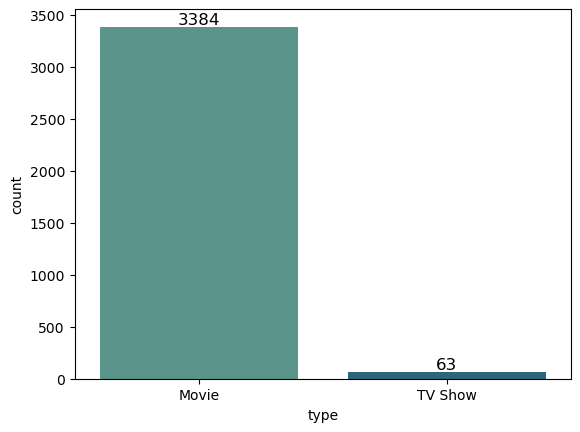

In [39]:
ax = sns.countplot(x ='type', data = df, palette="crest")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),ha='center', va='bottom', fontsize=12)
plt.show()

C:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='Count'>

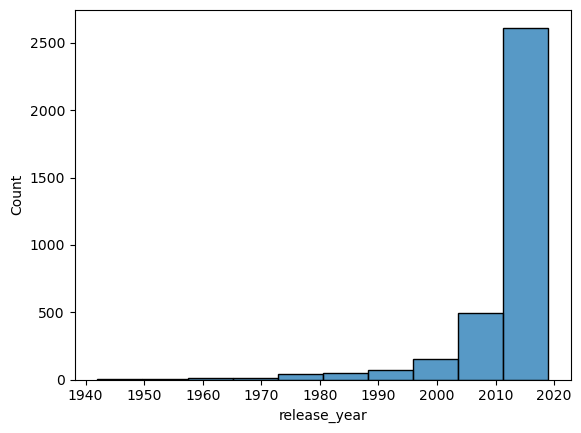

In [40]:
sns.histplot(df["release_year"], bins=10)

C:\Users\Govinda Bennurkar\AppData\Local\Temp\ipykernel_5024\2351381156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], bins=20, kde=True)
C:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='Density'>

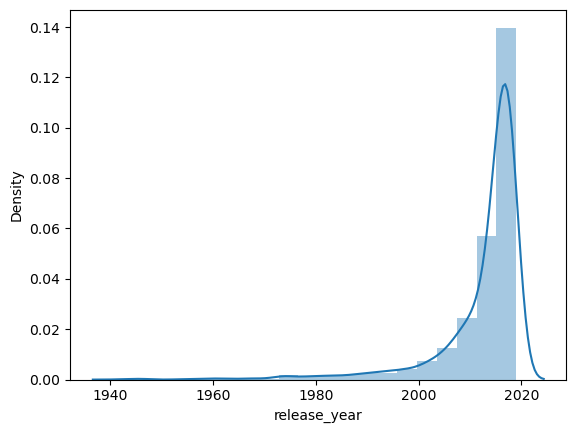

In [41]:
sns.distplot(df['release_year'], bins=20, kde=True)

In [44]:
pd.isnull(df)
pd.isnull(df).sum()
df.dropna(inplace=True)
df['actors'] = df['cast'].apply(lambda x: x.split(', ') if not pd.isna(x) else [])
df.drop(columns='cast', inplace=True)

KeyError: 'cast'

In [45]:
df['actors']

2       [Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor,...
3       [Mama Sane, Amadou Mbow, Ibrahima Traore, Nico...
5       [Ramsey Nouah, Chigul, Sola Sobowale, Ireti Do...
6       [Hakim Faris, Victoire Du Bois, Patrick d'Assu...
7       [Thabo Rametsi, Thabo Malema, Welile Nzuza, Ja...
                              ...                        
5831    [Luis Tosar, Gael García Bernal, Juan Carlos A...
5832    [Nick Pawlow, Jordu Schell, Jay Kushwara, Mich...
5833    [Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...
5834    [Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...
5836    [Barbara King, Shaana Diya, John Krisiukenas, ...
Name: actors, Length: 3447, dtype: object

In [46]:
df['country'] = df['country'].str.split(',')
df_country = df.explode('country')
df_country['country'] = df_country['country'].apply(lambda x: x.strip())
IND_data = df_country[df_country["country"] == "India"]
IND_data

,show_id,title,director,country,date_added,release_year,rating,duration,listed_in,description,type,actors
2,81213894,The Zoya Factor,Abhishek Sharma,India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,"[Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor,..."
24,81194544,Evvarikee Cheppoddu,Basava Shankar Eeday,India,"November 27, 2019",2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",When caste differences throw a wrench into the...,Movie,"[Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D ..."
34,81215481,Pranaam,Sanjiv Jaiswal,India,"November 25, 2019",2019,TV-MA,117 min,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...,Movie,"[Rajeev Khandelwal, Samiksha Singh, S.M. Zahee..."
69,81217738,Dorasaani,KVR Mahendra,India,"November 20, 2019",2019,TV-14,134 min,"Dramas, International Movies, Romantic Movies",A village landlord's daughter and an educated ...,Movie,"[Anand Deverakonda, Shivatmika Rajasekhar, Kan..."
78,81217739,Mallesham,Raj R,India,"November 20, 2019",2019,TV-PG,131 min,"Dramas, Independent Movies, International Movies","A self-trained engineer risks debt, love and r...",Movie,"[Jhansi, Priyadarshi Pullikonda, Ananya Nagalla]"
...,...,...,...,...,...,...,...,...,...,...,...,...
5407,70153553,Harud,Aamir Bashir,India,"October 1, 2016",2010,TV-14,100 min,"Dramas, International Movies",A young Kashmiri man sets out to escape to Pak...,Movie,"[Mohammad Amir Naji, Shahnawaz Bhat, Shamim Ba..."
5420,80038288,Umrika,Prashant Nair,India,"October 1, 2016",2015,TV-14,96 min,"Dramas, Independent Movies, International Movies",An ambitious man leaves his small Indian villa...,Movie,"[Suraj Sharma, Tony Revolori, Smita Tambe, Adi..."
5478,80115686,Dhanak,Nagesh Kukunoor,India,"August 20, 2016",2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,Movie,"[Krrish Chhabria, Hetal Gada, Vipin Sharma, Gu..."
5530,80097355,Brahman Naman,Qaushiq Mukherjee,India,"July 6, 2016",2016,TV-MA,96 min,"Comedies, Independent Movies, International Mo...",This homage to 1980s teen sex comedies follows...,Movie,"[Shashank Arora, Tanmay Dhanania, Chaitanya Va..."


In [47]:
IND_data = IND_data.explode('actors')
top_10_IND_actors = IND_data["actors"].value_counts(normalize=True).head(10).index.to_list()
top_10_IND_data = IND_data[IND_data["actors"].isin(top_10_IND_actors)]
top_10_IND_actors

['Anupam Kher',
 'Shah Rukh Khan',
 'Akshay Kumar',
 'Om Puri',
 'Paresh Rawal',
 'Boman Irani',
 'Kareena Kapoor',
 'Naseeruddin Shah',
 'Gulshan Grover',
 'Kay Kay Menon']

<Axes: xlabel='type'>

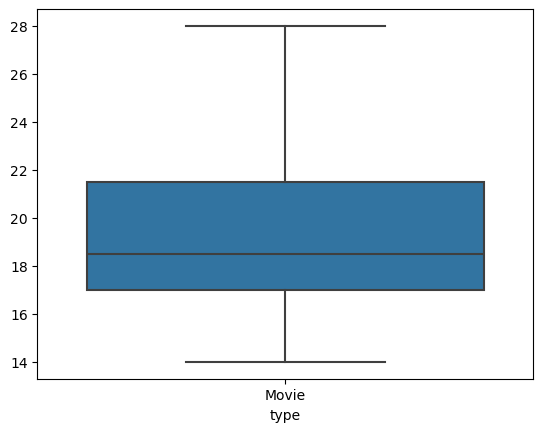

In [48]:
IND_data_pvt = top_10_IND_data.pivot_table(index="actors", columns="type", values="rating", aggfunc="count", fill_value=0)
sns.boxplot(IND_data_pvt)

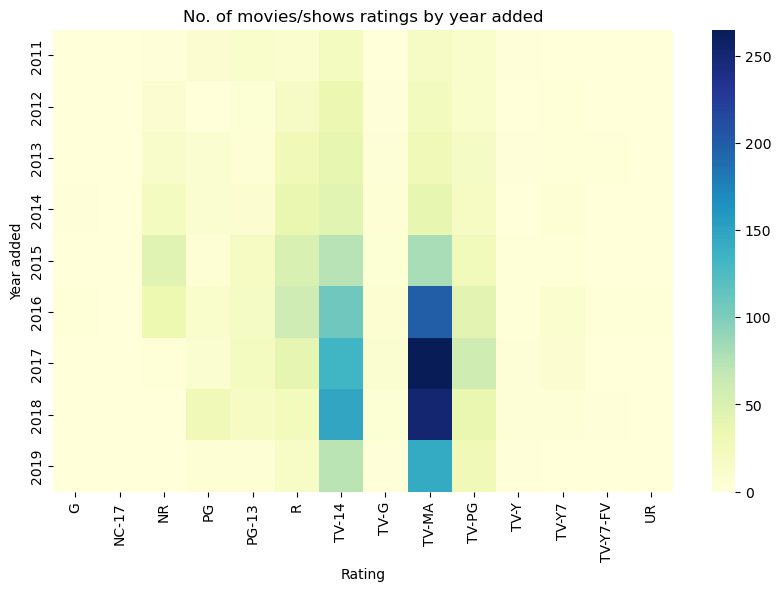

In [49]:
heatmap_data = df[df['release_year']>=2011].pivot_table(index='release_year', columns='rating',values='type', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,  cmap='YlGnBu', cbar=True)
plt.title('No. of movies/shows ratings by year added')
plt.xlabel('Rating')
plt.ylabel('Year added')
plt.show()

In [ ]:
###From the above heat map we can infer that TV-MA, TV-14 rated movies/shows are more available.
Missing Value & Outlier check
Removed NAN value values from give netflix data frame
Removed International Movies from genre list as the internatinal movie cannot be consider as genre
Insights based on Non-Graphical and Visual Analysis
Insights based on Non-Graphical

With help of .info we can understand the datatypes of different columns

Top 5 Genre {Dramas,Comedies,Action & Adventure,Independent Movies,Romantic Movies} this is most preferable genre for year 1940to2020

Top 5 Country {United States,India,United Kingdom,Japan,South Korea} that makes and release the shows on netflix

Top 10 India Actors in Netflix dataset {Anupam Kher,Shah Rukh Khan,Naseeruddin Shah,Om Puri,Akshay Kumar,Amitabh Bachchan,Paresh Rawal,Boman Irani,Kareena Kapoor,Ajay Devgn}

Insights based on Visual Analysis

And till 2020 data from netflix dataset

Number of Movies is approximately twice the number of TV shows

As we are moving forward with refernce to years more movies and shows are released in 2020

India is second in producing most movies & also producing more movies compared to TV shows.

Business Insights
Most popular genres among users are Dramas,Comedies,Action & Adventure,Independent Movies,Romantic Movies,this can guide content acquisition and production decisions. This insight helps to understand this type of content attracts more viewers.

In Indian market people prefer more movies compare to TV shows.

But mostly international movies are preferred in all the other countries.

Recommendations
With refer to Heatmap the target Audience age should be above 17+

So we should focus on college students and provide them subscription discounts

People prefer mature content so according to that most of the content should be released

India is the second highest market and still the open market for netflix

People like to watch Dramas and Comedies contents